In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from math import sin, sqrt, log2, ceil
from random import shuffle
%matplotlib inline


 ### 1. implementar um algoritmo genético (codificação binária) para maximizar a função.

In [2]:
#Conversão de Bits para Inteiro
def binary_to_decimal(binary):
    i,integer = 0,0
    size = len(binary)
    while i < len(binary):
        integer += int(binary[size - 1 - i])*pow(2,i)
        i+=1
    return integer   

# Função de Geração da População Inicial

def populacaoBinaria(L, bits,xmin,xmax):
    
    temp = np.round(np.random.rand(L,bits)) #População Inicial Aleatória Binaria
    Po_Binario = temp.astype('int')
    I = []
    Po = []
    for i in range (0,L):
        x= int (binary_to_decimal (Po_Binario[i,:]))
        I.append(x)
        y = xmin + x*(xmax-xmin)/(2**bits-1)
        Po.append(y)
    return Po,Po_Binario

#### 2. Definir as funções objetivos (Fitness)

In [3]:
# Definindo a Função do Fitness

def fitness(x):
    fit = (1/(((x-3)**2)+0.1)) + (1/(((x-2)**2)+0.05)) + 2
    return fit

#Avaliação do Fitness da População
def avaliacao(Po):
    Fitness = []
    L = len (Po)
    for i in range(0,L):
        Fitness.append(100-fitness(Po[i])) #Tornando um problema de maximização (falta confirmar)
    return Fitness

#### 3. Para cada função, implemente os algoritmos de seleção por roleta e por torneio, compare suas respostas.

In [4]:
# Seleção dos indivíduos usando o Método da Roleta

def selecao_roleta(Po, Po_Binario, bits, Fitness):
    L= len(Po)
    Probabilidade = np.array(Fitness)/ sum(Fitness)
    Prob_Acumulativa = Probabilidade.cumsum()
    indice_Sel = []
    for i in range (0,L):
        roleta = np.random.rand()
        z = filter(lambda r:r>roleta, Prob_Acumulativa)
        T = len(list(z))
        indice_Sel.append(L-T)
    Ps_Binario = np.zeros((L,bits))
    Ps = np.zeros((L,1))
    for i in range (0, L):
        Ps[i] = Po[indice_Sel[i]]
        Ps_Binario[i,:] = Po_Binario[indice_Sel[i],:]
    return Ps,Ps_Binario

# Seleção dos indivíduos usando o Método do Torneio

def selecao_torneio (Po,Po_Binario,bits,Fitness):
    L= len(Po)
    
    Ps_Binario = np.zeros((int(L/2), bits))
    for i in range (int(L/2)):
        if Fitness [2*i]>Fitness[2*i+1]:
            Ps_Binario[i,:] = Po_Binario[2*i,:]
        else:
            Ps_Binario[i,:] = Po_Binario[2*i+1,:bits]
            
    shuffle(Ps_Binario)
    
    Ps = []
    for i in range (0, int(L/2)):
        x= int(binary_to_decimal(Pm_Binario[i,:]))
        y = xmin + x*(xmax-xmin)/(2**bits-1)
        Ps.append(y)
        
    return Ps,Ps_Binario

#### 4. Avalie o efeito do aumento ou diminuição do tamanho da população inicial, e mudança nos valores das probabilidades de cruzamento e mutação

In [5]:

#Operação de Cruzamento
def cruzamento(Ps_Binario,bits,probc):
    L = len (Ps_Binario)
    #Operador de Cruzamento
    Pc_Binario = np.zeros((L,bits))
    for i in range(0,int(L/2)):                  #Seleciona (L/2) pares
        r = np.random.rand()                     #Geração de um número aleatorio   
        if r <= probc:                           #Se o numero aleatorio for menor do que probc então se realiza o cruzamento
            alfa = np.random.randint(1,bits-1)   #Ponto de Cruzamento            
            P1 = Ps_Binario[2*i-1+1,:]           #Pai 1
            P2 = Ps_Binario[2*i+1,:]             #Pai 2            
            Pc_Binario[2*i-1+1,:] = np.concatenate((P1[0:alfa+1], P2[alfa+1:bits]))   #Filho 1
            Pc_Binario[2*i+1,:]   = np.concatenate((P2[0:alfa+1], P1[alfa+1:bits]))   #Filho 2  
        else:
            alfa = 0
            Pc_Binario[2*i-1+1,:] = Ps_Binario[2*i-1+1,:]  #Copia o Pai 1
            Pc_Binario[2*i+1,:]   = Ps_Binario[2*i+1,:]    #Copia o Pai 2 
    return Pc_Binario  


#Operador de Mutação

def mutacao(Pc_Binario,bits,loop,probm,xmin,xmax):
    L = len(Pc_Binario)
    Pm_Binario = Pc_Binario
    for i in range(0,L):    
        for j in range(0,bits):
            r = np.random.rand()                     #Geração de um número aleatorio   
            if r <= probm:                           #Se o numero aleatorio for menor do que probm então se realiza a mutação
                if (Pc_Binario[i][j] == 1):
                    Pm_Binario[i][j] = 0
                elif (Pc_Binario[i][j] == 0):
                    Pm_Binario[i][j] = 1 

    #Avaliação da População após a Mutação  
    Fitness_Final = []
    Pfinal = []
    L = len(Pm_Binario)
    for i in range(0,L):
        x =  int(binary_to_decimal(Pm_Binario[i,:]))
        y = xmin + x*(xmax-xmin)/(2**bits - 1)
        Pfinal.append(y)
        Fitness_Final.append(100-fitness(y))         
    return Pm_Binario, Fitness_Final,Pfinal  

# Operador de elitismo

def elitismo (Fitness_Inicial, Fitness_Final, loop, Po,Po_Binario, Pm_Binario, Pfinal):
    
    # Substituindo o pior da população Inicial com a Melhor População FInal
    Bad_Inicial = np.argmin(Fitness_Inicial)
    Best_Final = np.argmax(Fitness_Final)
    
    if Fitness_Final[Best_Final] > Fitness_Inicial [Bad_Inicial]:
        Po[Bad_Inicial] = Pfinal[Best_Final]
        Po_Binario[Bad_Inicial,:] = Pm_Binario[Best_Final,:]
        Fitness_Inicial = avaliacao(Po)
    return Po, Po_Binario, Fitness_Inicial 


#### 5. Compare as diferentes respostas da função de fitness versus o número de gerações. Explique as estagnações nas evoluções.

In [6]:
# Programa Principal

xmin = -2      # Valor mínimo
xmax = 8       # Valor máximo
L= 20          # Tamanho da população 
probc = 0.7    # Probabilidade de cruzamento
probm  = 0.1 # Probabilidade de mutação
geracoes = 20  # Nº de gerações
bits = 20      # Nº de bits para a reprodução 
Po,Po_Binario = populacaoBinaria(L,bits,xmin,xmax)
Po_inicial = np.zeros(L)
Po_inicial = Po[:]

Po_Binario_inicial = np.zeros((L,bits))
Po_Binario_inicial [:,:]= Po_Binario[:,:]

Fitness_Inicial = avaliacao(Po)
linha = []
out = []
SolucaoX = []
# ALGORITMO GENÉTICO

for loop in range(geracoes):
    out.append(max(Fitness_Inicial))
    linha.append(loop)
    indice_Best_Solucao = np.argmax (Fitness_Inicial)
    
    
    SolucaoX.append(Po[indice_Best_Solucao])
    # Operador da Seleção Roleta
    Ps, Ps_Binario = selecao_roleta (Po,Po_Binario,bits,Fitness_Inicial)
    # Operador de cruzamento
    Pc_Binario = cruzamento(Ps_Binario,bits,probc)
    # Operador de mutação
    Pm_Binario,Fitness_Final,Pfinal = mutacao(Pc_Binario, bits,loop, probm, xmin, xmax)
    # Operador de elitismo
    Po,Po_Binario, Fitness_Inicial = elitismo(Fitness_Inicial, Fitness_Final, loop, Po, Po_Binario,Pm_Binario,Pfinal)

outR = np.array(out)
SolucaoXR = np.array(SolucaoX)
linhaR = np.array(linha)

Po[:] = Po_inicial[:]
Po_Binario[:] = Po_Binario_inicial[:]

Fitness_Inicial = avaliacao(Po)
linha = []
out = []
SolucaoX = []

for loop in range(geracoes):
    out.append(max(Fitness_Inicial))
    linha.append(loop)
    indice_Best_Solucao = np.argmax(Fitness_Inicial)
    
    SolucaoX.append(Po[indice_Best_Solucao])
    # Operador de Seleção Torneio
    Ps, Ps_Binario = selecao_torneio (Po, Po_Binario, bits, Fitness_Inicial)
    # Operador de cruzamento
    Pc_Binario = cruzamento(Ps_Binario,bits,probc)
    # Operador de mutação
    Pm_Binario, Fitness_Final, Pfinal = mutacao(Pc_Binario, bits, loop, probm, xmin, xmax)
    Po,Po_Binario,Fitness_Inicial = elitismo(Fitness_Inicial,Fitness_Final,loop,Po,Po_Binario,Pm_Binario,Pfinal)
    
outT = np.array(out)
SolucaoXT = np.array(SolucaoX)
linhaT = np.array(linha)




(0.0, 20.0, 90.0, 102.0)

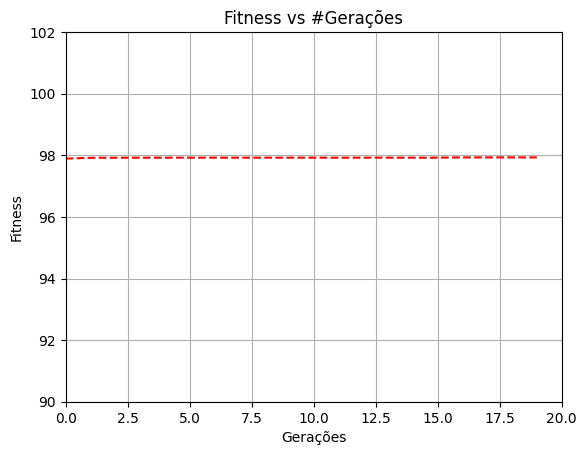

In [7]:
#Solução Final
plt.plot(linha, out, 'r--')
plt.title("Fitness vs #Gerações")
plt.xlabel("Gerações")
plt.ylabel("Fitness")
plt.grid("on")    
plt.axis([0, geracoes, 90, 102]) 

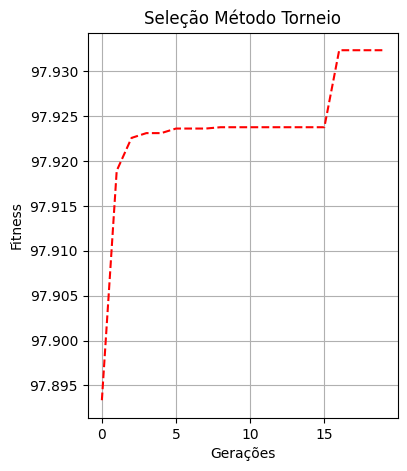

In [8]:
# Gráfico_Seleção Torneio

plt.figure(figsize=(4, 5))
plt.plot(linhaT, outT, 'r--')
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.title('Seleção Método Torneio')
plt.grid(True)
plt.show()

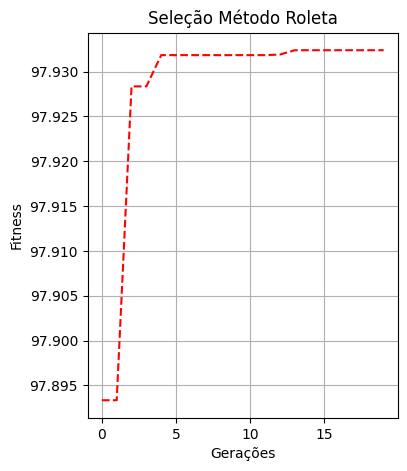

In [9]:
# Gráfico_Seleção Roleta

plt.figure(figsize=(4, 5))
plt.plot(linhaR, outR, 'r--')
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.title('Seleção Método Roleta')
plt.grid(True)
plt.show()

In [10]:
print('Máximo da Função')
print('Seleção Roleta:', (max(outR)))
print('Seleção Torneio:',(max(outT))) 

Máximo da Função
Seleção Roleta: 97.93237986866804
Seleção Torneio: 97.93235589741653


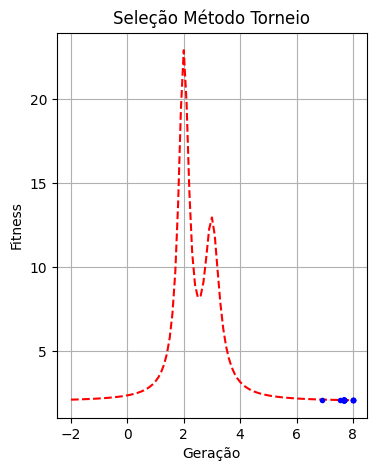

In [11]:
# Seleção Método Torneio - Procura por soluções

in_array = np.arange(xmin,xmax,0.1)
out_array = []   
lista = range(len(in_array))
for i in lista: 
    out_array.append(fitness(in_array[i]))

SolucaoY = []    
lista2 = range(len(SolucaoXT))    
for i in lista2:
    SolucaoY.append(fitness(SolucaoXT[i]))   

plt.figure(figsize=(4, 5))
plt.plot(in_array, out_array, 'r--',SolucaoX,SolucaoY,'b.')
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.title('Seleção Método Torneio')
plt.grid(True)
plt.show()

In [12]:
print('Seleção Torneio:',(max(SolucaoX)))
print('Seleção Torneio:',(max(SolucaoY))) 

Seleção Torneio: 7.997444150394584
Seleção Torneio: 2.106644248051525


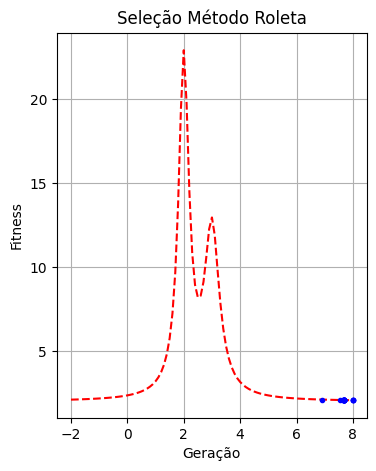

In [13]:
in_array = np.arange(xmin,xmax,0.1)
out_array = []
lista = range(len(in_array))
for i in lista:
    out_array.append(fitness(in_array[i]))
    
SolucaoY = []
lista2 = range(len(SolucaoXR))
for i in lista2:
    SolucaoY.append(fitness(SolucaoXR[i]))
    
plt.figure(figsize=(4, 5))
plt.plot(in_array, out_array, 'r--',SolucaoX,SolucaoY,'b.')
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.title('Seleção Método Roleta')
plt.grid(True)
plt.show()

In [14]:
print('Seleção Roleta:',(max(SolucaoX)))
print('Seleção Roleta:',(max(SolucaoY))) 

Seleção Roleta: 7.997444150394584
Seleção Roleta: 2.106644248051525


 ### implementar uma estratégia evolutiva (codificação decimal) para maximizar a função.


In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import sin, sqrt, log2, ceil
from random import shuffle, seed, randint
%matplotlib inline
seed()

In [16]:
def populacaodecimal(L,xmin,xmax,ymin,ymax):

    xrand = xmin + (xmax - xmin)*np.random.rand(L,1)
    yrand = ymin + (ymax - ymin)*np.random.rand(L,1)
    Po = np.zeros((L,2))
    Po[:,0] = xrand[0:L,0]
    Po[:,1] = yrand[0:L,0]

    return Po

#Função do Fitness
def fitness(x,y):
    fit = 0.5-(np.sin(np.sqrt(x**2 + y**2))**2-0.5)/(1+0.001*(x**2+y**2))**2
    return fit

#Avaliação da aptidão da População

def avaliacao(Po):
    Fitness = []
    L = len(Po)
    for i in range(0,L):
        
        Fitness.append(fitness(Po[i,0],Po[i,1]))
    return Fitness 

In [17]:
def selecao_roleta(Po,Fitness):
    #Seleção usando o método da roleta
    L = len(Po)
    Probabilidade = np.array(Fitness)/sum(Fitness)
    Prob_Acumulativa = Probabilidade.cumsum()
    indice_Sel = []
    for i in range(0,L):
        roleta = np.random.rand()
        z = filter(lambda r:r>roleta, Prob_Acumulativa)
        T = len(list(z))
        indice_Sel.append(L-T)
    Ps = np.zeros((L,2))
    for i in range(0,L):
        Ps[i]=Po[indice_Sel[i]]
    return Ps

# Seleção dos Indivídos para Reprodução - Método de Torneio

def selecao_torneio(Po,Fitness):
  L , dim = Po.shape

  Ps = np.zeros((int(L/2),dim))
  for i in range(int(L/2)): 
    if Fitness[2*i] > Fitness[2*i+1]:
      Ps[i,:] = Po[2*i,:]
    else:
      Ps[i,:] = Po[2*i+1,:]
    
  shuffle(Ps)
  return Ps

In [18]:
# Operador de Cruzamento

def cruzamento(Po,probc):
    L , dim = Po.shape
    #Operador de Cruzamento
    Pc = np.zeros((L,dim))
    for i in range(0,int(L/2)): #Seleciona (L/2) pares
        r = np.random.rand()                      
        if r <= probc:                           
            alfa = np.random.rand() # Fator de cruzamento
            P1 = Po[2*i,:] # Pai 1
            P2 = Po[2*i+1,:] # Pai 2            
            Pc[2*i,:] =  alfa*P1 + (1-alfa)*P2  # Filho 1
            Pc[2*i+1,:]   =  alfa*P2 + (1-alfa)*P1 # Filho 2  
        else:
            Pc[2*i,:] = Po[2*i,:]  
            Pc[2*i+1,:]   = Po[2*i+1,:]    
        
        ultimo = Pc[-1,:]
        if ultimo[0] == 0.0 and ultimo[1] == 0.0:
          i = randint(0,len(Pc)-1)
          Pc[len(Pc)-1,:] = Pc[i,:]
    return Pc 


In [19]:
# Operador de mutação

def mutacaogaussiana(Pc, probm, xmin, xmax, ymin, ymax):
    Pm = Pc.copy()
    L = len(Pc)
    for i in range(0, L):
        r = np.random.rand()  
        if r <= probm: 
            Pm[i, 0] = np.clip(Pm[i, 0] + np.random.normal(0, 1), xmin, xmax)  
            Pm[i, 1] = np.clip(Pm[i, 1] + np.random.normal(0, 1), ymin, ymax)  
    return Pm


In [20]:
# Operador de Elitismo

def elitismo(Po_Inicial,Po_Final):
    Fitness_Inicial = avaliacao(Po_Inicial)
    Fitness_Final = avaliacao(Po_Final)
    
    Bad_Inicial = np.argmin(Fitness_Inicial)
    Best_Final = np.argmax(Fitness_Final)
    
    if Fitness_Final[Best_Final] > Fitness_Inicial[Bad_Inicial]:
        Po_Inicial[Bad_Inicial] = Po_Final[Best_Final]
    return Po

In [21]:
# Estratégia Evolutiva

L = 22
xmin = -100
xmax = 100
ymin = -100
ymax = 100
pc = 0.8           # Probabilidade de cruzamento
probm = 0.03       # Probabilidade de mutação
geracoes = 30      # numero de gerações


Po_inicial = populacaodecimal(L,xmin,xmax,ymin,ymax)
Po = np.zeros((L,2))
Po[:,0] = Po_inicial[:,0]
Po[:,1] = Po_inicial[:,1]
Fitness = avaliacao(Po)

out = []
linha = []
SolucaoX = []

for loop in range(0, geracoes):
    Fitness_Inicial = avaliacao(Po) 
    out.append(max(Fitness_Inicial))
    linha.append(loop)
    indice_Best_Solucao = np.argmax(Fitness_Inicial)
    
    # Operador de Seleção Roleta
    Ps = selecao_roleta(Po, Fitness_Inicial)    
    # Operador de Cruzamento
    Pc = cruzamento(Ps, pc)
    # Operador de Mutação
    Pm = mutacaogaussiana(Pc, probm, xmin, xmax, ymin, ymax)  
    # Operador de Elitismo
    Po = elitismo(Po,Pm)

linhaR = linha
outR = out


Po = np.zeros((L,2))
Po[:,0] = Po_inicial[:,0]
Po[:,1] = Po_inicial[:,1]

linha = []
out = []
SolucaoX = []

for loop in range(0,geracoes):
    Fitness_Inicial = avaliacao(Po) 
    out.append(max(Fitness_Inicial))
    linha.append(loop)
    indice_Best_Solucao = np.argmax(Fitness_Inicial)    
    SolucaoX.append(Po[indice_Best_Solucao]) 
    
    # Operador de Seleção Torneio
    Ps = selecao_torneio(Po,Fitness_Inicial)  
    #Operador de Cruzamento
    Pc = cruzamento(Ps,pc)
    #Operador de Mutação
    Pm = mutacaogaussiana(Pc,probm,xmin,xmax,ymin,ymax)       
    #operador de Elitismo
    Po = elitismo(Po,Pm)

linhaT = linha
outT = out

print('Seleção Torneiro:',(max(outT)))
print('Seleção Roleta:',(max(outR)))


Seleção Torneiro: 1.0
Seleção Roleta: 0.821777567005787


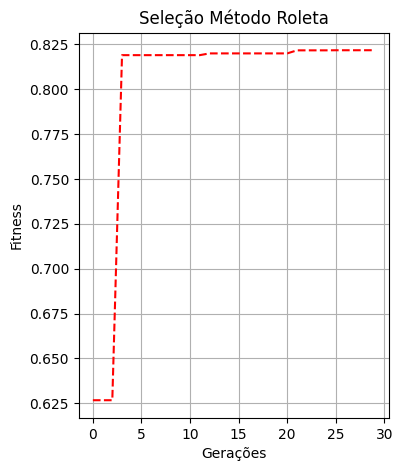

In [22]:
# Gráfico_Seleção Roleta

plt.figure(figsize=(4, 5))
plt.plot(linhaR, outR, 'r--')
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.title('Seleção Método Roleta')
plt.grid(True)
plt.show()

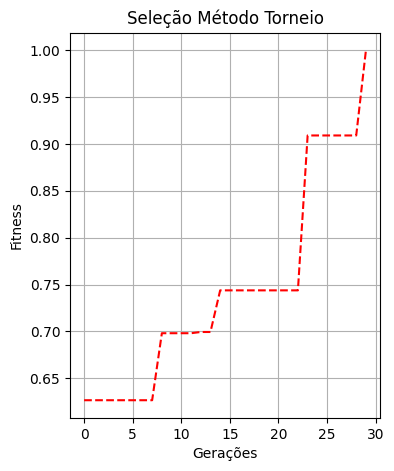

In [23]:
# Gráfico_Seleção Torneio

plt.figure(figsize=(4, 5))
plt.plot(linhaT, outT, 'r--')
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.title('Seleção Método Torneio')
plt.grid(True)
plt.show()

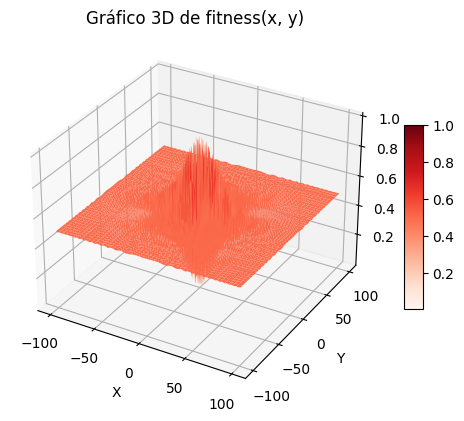

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Definir limites do gráfico
xmin, xmax = -100, 100
ymin, ymax = -100, 100

# Reduzir a resolução da malha
spacing = 0.05

# Criar malhas bidimensionais para X e Y com menor resolução
x = np.arange(xmin, xmax, spacing)
y = np.arange(ymin, ymax, spacing)
X, Y = np.meshgrid(x, y)

# Calcula valores de Z usando a função fitness
Z = fitness(X, Y)

# Cria a figura e o eixo 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


surf = ax.plot_surface(X, Y, Z, cmap='Reds')
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
surf.set_clim(np.min(Z), np.max(Z))

# Adicionar rótulos e título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Gráfico 3D de fitness(x, y)')
plt.show()

In [25]:
print('Valor máximo calculado: ',np.max(Z))
print('Seleção Torneio:',np.sqrt(max(outT)))
print('Seleção Roleta:',np.sqrt(max(outR)))

Valor máximo calculado:  1.0
Seleção Torneio: 1.0
Seleção Roleta: 0.9065194796615167
